In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
import os
import numpy as np
%matplotlib inline

In [40]:
train_path='Datasets/train'
valid_path='Datasets/val'
test_path='Datasets/testing'

In [41]:
train_batches=ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(256,256),classes=['diseased cotton leaf','fresh cotton leaf'],batch_size=10)
val_batches=ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(256,256),classes=['diseased cotton leaf','fresh cotton leaf'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(256,256),classes=['diseased cotton leaf','fresh cotton leaf'],shuffle=False)

Found 715 images belonging to 2 classes.
Found 135 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [42]:
model=Sequential([Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                  MaxPooling2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=2,activation='softmax'),
])

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)      

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.fit(x=train_batches, validation_data=val_batches,epochs=10

Epoch 1/10
72/72 [==============================] - 25s 341ms/step - loss: 4.0258 - accuracy: 0.7385 - val_loss: 0.6919 - val_accuracy: 0.9259
Epoch 2/10
72/72 [==============================] - 25s 340ms/step - loss: 0.7166 - accuracy: 0.9007 - val_loss: 0.5912 - val_accuracy: 0.9407
Epoch 3/10
72/72 [==============================] - 24s 339ms/step - loss: 0.3163 - accuracy: 0.9483 - val_loss: 0.7606 - val_accuracy: 0.9333
Epoch 4/10
72/72 [==============================] - 24s 338ms/step - loss: 0.1341 - accuracy: 0.9748 - val_loss: 0.8894 - val_accuracy: 0.9111
Epoch 5/10
72/72 [==============================] - 25s 340ms/step - loss: 0.0984 - accuracy: 0.9790 - val_loss: 0.4214 - val_accuracy: 0.9407
Epoch 6/10
72/72 [==============================] - 31s 433ms/step - loss: 7.8869e-04 - accuracy: 1.0000 - val_loss: 0.4258 - val_accuracy: 0.9259
Epoch 7/10
72/72 [==============================] - 33s 465ms/step - loss: 3.5325e-04 - accuracy: 1.0000 - val_loss: 0.3877 - val_accuracy

In [54]:
test_imgs,test_labels=next(test_batches)
print(test_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [55]:
test_batches.classes

array([0, 0, 0, 1, 1, 1, 1])

In [56]:
predictions=model.predict(x=test_batches, verbose=0)

In [57]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [58]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
test_batches.class_indices

{'diseased cotton leaf': 0, 'fresh cotton leaf': 1}

Confusion matrix, without normalization
[[3 0]
 [0 4]]


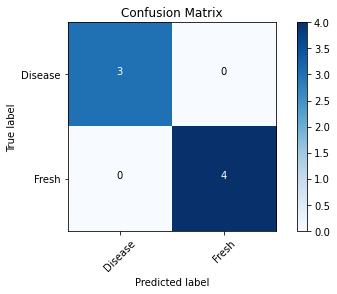

In [61]:
cm_plot_labels = ['Disease','Fresh']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')